<a href="https://colab.research.google.com/github/Hultsfield/Pattern_Recognition_final_project/blob/main/FastFlow_improved.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q anomalib lightning matplotlib pandas
print("環境安裝完成")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.9/44.9 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 851.8/851.8 kB 29.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 846.0/846.0 kB 26.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.8/241.8 kB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 63.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 64.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.2/23.2 MB 99.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.5/849.5 kB 57.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 107.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 760.5/760.5 kB 54.0 MB/s eta 0:00:00
環境安裝完成


In [2]:
!unzip /content/data.zip -d /content/

Archive:  /content/data.zip
   creating: /content/bottle/
   creating: /content/bottle/ground_truth/
   creating: /content/bottle/ground_truth/broken_large/
  inflating: /content/bottle/ground_truth/broken_large/000_mask.png  
  inflating: /content/bottle/ground_truth/broken_large/001_mask.png  
  inflating: /content/bottle/ground_truth/broken_large/002_mask.png  
  inflating: /content/bottle/ground_truth/broken_large/003_mask.png  
  inflating: /content/bottle/ground_truth/broken_large/004_mask.png  
  inflating: /content/bottle/ground_truth/broken_large/005_mask.png  
  inflating: /content/bottle/ground_truth/broken_large/006_mask.png  
  inflating: /content/bottle/ground_truth/broken_large/007_mask.png  
  inflating: /content/bottle/ground_truth/broken_large/008_mask.png  
  inflating: /content/bottle/ground_truth/broken_large/009_mask.png  
  inflating: /content/bottle/ground_truth/broken_large/010_mask.png  
  inflating: /content/bottle/ground_truth/broken_large/011_mask.png  
  i

In [87]:
# 套件匯入與基本設定
import torch
import numpy as np
import matplotlib.pyplot as plt
from anomalib.data import MVTecAD
from anomalib.models import Fastflow
from anomalib.engine import Engine
from torchvision.transforms.v2 import Compose, Resize, ToTensor
from lightning.pytorch.callbacks import TQDMProgressBar

# 固定隨機種子
torch.manual_seed(67)

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
print(f"使用裝置: {DEVICE}")

使用裝置: cuda


In [88]:
# 資料集設定(MVTec AD)
DATASET_ROOT = "./datasets/MVTec" # 資料集路徑
CATEGORY = "bottle" # 可替換 capsule / cable / hazelnut...

# 影像前處理
transform = Compose([
  Resize((256, 256), antialias=True),
  ToTensor(),
])

# DataModule
datamodule = MVTecAD(
  root=DATASET_ROOT,
  category=CATEGORY,
  train_batch_size=32,
  eval_batch_size=32,
  num_workers=2,
)

datamodule.train_transform = transform
datamodule.eval_transform = transform

print("資料集設定完成")

資料集設定完成


/usr/local/lib/python3.12/dist-packages/torchvision/transforms/v2/_deprecated.py:42: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.Output is equivalent up to float precision.
  warnings.warn(


In [89]:
# 建立FastFlow模型
model = Fastflow(
  backbone="wide_resnet50_2",
  flow_steps=8,
)

print("FastFlow 模型建立完成")

FastFlow 模型建立完成


In [90]:
# 訓練設定與執行
MY_EPOCHS = 50

engine = Engine(
  max_epochs=MY_EPOCHS,
  accelerator="auto",
  devices=1,
  callbacks=[TQDMProgressBar(refresh_rate=20)],
)

print(f"開始訓練 FastFlow（Epochs = {MY_EPOCHS}）")
engine.fit(model=model, datamodule=datamodule)
print("訓練完成")

INFO:lightning_fabric.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:lightning_fabric.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


開始訓練 FastFlow（Epochs = 50）


┏━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┓
┃   ┃ Name           ┃ Type          ┃ Params ┃ Mode  ┃ FLOPs ┃
┡━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━┩
│ 0 │ pre_processor  │ PreProcessor  │      0 │ train │     0 │
│ 1 │ post_processor │ PostProcessor │      0 │ train │     0 │
│ 2 │ evaluator      │ Evaluator     │      0 │ train │     0 │
│ 3 │ model          │ FastflowModel │ 91.9 M │ train │     0 │
│ 4 │ loss           │ FastflowLoss  │      0 │ train │     0 │
└───┴────────────────┴───────────────┴────────┴───────┴───────┘

Trainable params: 45.0 M                                                                                           
Non-trainable params: 46.9 M                                                                                       
Total params: 91.9 M                                                                                               
Total estimated model params size (MB): 367                                                                        
Modules in train mode: 372                                                                                         
Modules in eval mode: 0                                                                                            
Total FLOPs: 0

Training: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.12/dist-packages/lightning/pytorch/core/module.py:522: You called `self.log('train_loss', ..., logger=True)` but have no logger configured. You can enable one by doing `Trainer(logger=ALogger(...))`


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:lightning_fabric.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=50` reached.


訓練完成


In [91]:
# 模型測試與指標輸出
print("進行測試...")
test_results = engine.test(model=model, datamodule=datamodule)

# anomalib 回傳通常為 list[dict]
result = test_results[0] if isinstance(test_results, list) else test_results
image_auroc = result.get("image_AUROC", 0.0)

print("\n FastFlow 測試結果")
print("--------------------------------")
print(f"Image-level AUROC : {image_auroc:.4f}")
print("--------------------------------")

INFO:lightning_fabric.utilities.rank_zero:The following callbacks returned in `LightningModule.configure_callbacks` will override existing callbacks passed to Trainer: Evaluator, ImageVisualizer, PostProcessor, PreProcessor
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


進行測試...


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│        image_AUROC        │            1.0            │
│       image_F1Score       │    0.9919999837875366     │
│        pixel_AUROC        │    0.9869136810302734     │
│       pixel_F1Score       │    0.7558729648590088     │
└───────────────────────────┴───────────────────────────┘


 FastFlow 測試結果
--------------------------------
Image-level AUROC : 1.0000
--------------------------------


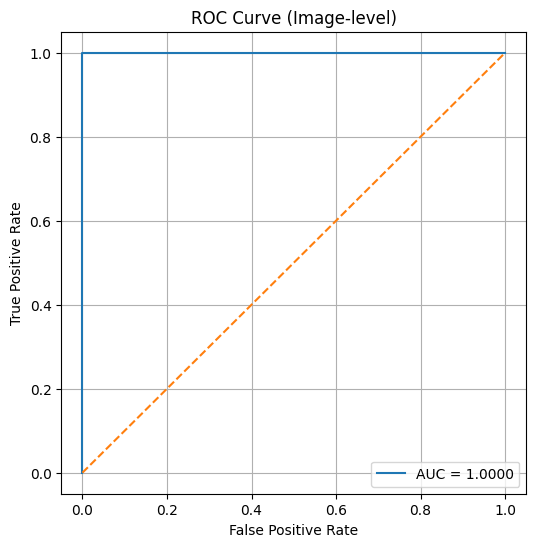

Image-level AUROC (recomputed) = 1.0000


In [92]:
# ROC 曲線
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(datamodule, model):
    datamodule.setup()
    test_loader = datamodule.test_dataloader()

    model.eval()
    model.to(DEVICE)

    y_true = []
    y_score = []

    with torch.no_grad():
        for batch in test_loader:
            images = batch.image.to(DEVICE)
            labels = batch.gt_label.cpu().numpy()

            preds = model(images)
            scores = preds.pred_score.cpu().numpy()

            y_true.extend(labels)
            y_score.extend(scores)

    fpr, tpr, _ = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}")
    plt.plot([0, 1], [0, 1], linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve (Image-level)")
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"Image-level AUROC (recomputed) = {roc_auc:.4f}")
plot_roc_curve(datamodule, model)

In [93]:
# 隨機顯示 num_samples 張瑕疵圖/ Ground Truth/ FastFlow預測熱力圖
def visualize_random_defects(datamodule, model, num_samples=5):
    print(f"隨機生成 {num_samples} 張瑕疵檢測視覺化...")

    datamodule.setup()
    test_loader = datamodule.test_dataloader()

    model.eval()
    model.to(DEVICE)

    # 收集所有瑕疵樣本 index
    anomaly_pool = []
    for batch in test_loader:
        for i, label in enumerate(batch.gt_label):
            if label == 1:
                anomaly_pool.append((batch, i))

    if len(anomaly_pool) == 0:
        print("測試集中未找到瑕疵樣本")
        return

    # 隨機抽樣
    selected = np.random.choice(len(anomaly_pool), size=min(num_samples, len(anomaly_pool)), replace=False)

    for idx in selected:
        batch, i = anomaly_pool[idx]

        images = batch.image.to(DEVICE)
        masks = batch.gt_mask

        with torch.no_grad():
            preds = model(images[i].unsqueeze(0))

        # 原圖
        img = images[i].cpu().permute(1, 2, 0).numpy()
        img = (img - img.min()) / (img.max() - img.min())
        # Ground Truth mask
        gt_mask = masks[i].cpu().numpy().squeeze()
        # FastFlow anomaly map
        anomaly_map = preds.anomaly_map[0].cpu().numpy().squeeze()
        # 繪圖
        fig, axes = plt.subplots(1, 3, figsize=(10, 5))

        axes[0].imshow(img)
        axes[0].set_title("Original Image")
        axes[0].axis("off")

        axes[1].imshow(gt_mask, cmap="gray")
        axes[1].set_title("Ground Truth Mask")
        axes[1].axis("off")

        axes[2].imshow(img)
        heat = axes[2].imshow(anomaly_map, cmap="jet", alpha=0.5)
        axes[2].set_title("FastFlow Prediction")
        axes[2].axis("off")
        plt.colorbar(heat, ax=axes[2], fraction=0.046, pad=0.04)

        plt.tight_layout()
        plt.show()

    print("隨機瑕疵視覺化完成")

隨機生成 3 張瑕疵檢測視覺化...


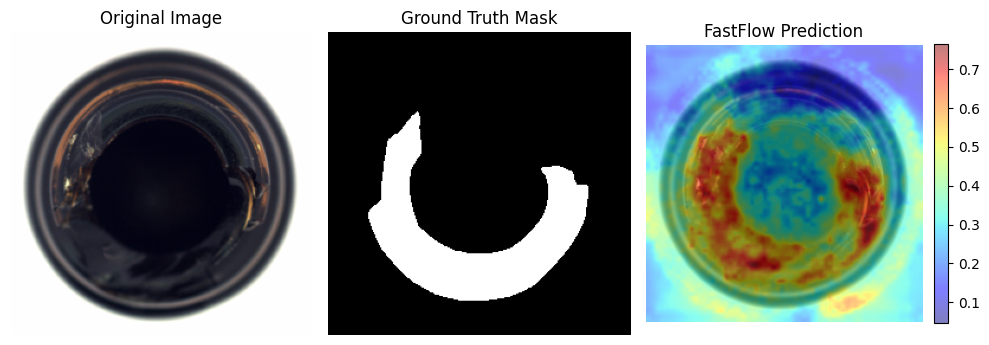

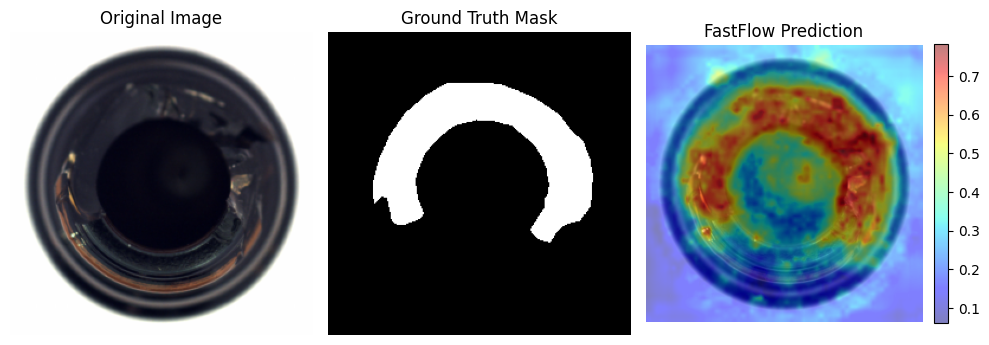

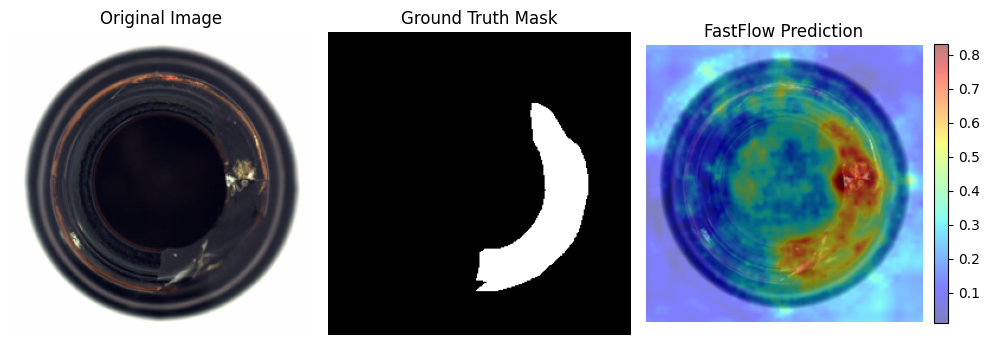

隨機瑕疵視覺化完成


In [107]:
# 執行視覺化
visualize_random_defects(datamodule, model, num_samples=3)